In [1]:
import numpy as np
import pandas as pd
import os
import tensorflow as tf
import cv2
import matplotlib.pyplot as plt

In [70]:
suffix_index = 3
suffixes = ["_norm", "_thresh_bin", "_thresh_zero", "_inv", "_merge_bin", "_merge_zero"]
suffix = suffixes[suffix_index - 1]
# suffix = "_thresh_bin"
# suffix = "_thresh_zero"
# suffix = "_inv"
# suffix = "_merge_bin"
# suffix = "_merge_zero"

In [71]:
train_model = "./drive/MyDrive/model/math/new/model_1" + suffix + ".h5"
# train_weight = "./drive/MyDrive/model/math/model_weights_1.h5"

model = tf.keras.models.load_model(train_model)

# print("Model summary: ")
# print(model.summary())

In [42]:
all_acc={}

In [5]:
batch_size = 128
img_row = 28
img_col = 28
channel = 1

In [7]:
labels = {'0': 0, '1': 1, '2': 2, '3': 3, '4': 4, '5': 5, '6': 6, '7': 7, '8': 8, '9': 9, 'add': 10, 'dec': 11, 'div': 12, 'eq': 13, 'mul': 14, 'sub': 15, 'x':16, 'y': 17, 'z': 18, '[': 19, ']': 20}
label = list(labels.keys())[:-2]

# labels = {'%': 0, '*': 1, '+': 2, '-': 3, '0': 4, '1': 5, '2': 6, '3': 7, '4': 8, '5': 9, '6': 10, '7': 11, '8': 12, '9': 13, '[': 14, ']': 15, "dec": 16, "eq": 17, "x": 18, "y": 19, "z": 20, "add": 2, "sub": 3, "mul": 1, "div": 0}
# label = list(labels.keys())[:-4]

# label = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'add', 'dec', 'div', 'eq', 'mul', 'sub', 'x', 'y', 'z', '[', ']']


num_classes = len(label)
print("Labels dict: ", labels)
print("Labels list: ", label)
print("Num of classes: ", num_classes)

Labels dict:  {'0': 0, '1': 1, '2': 2, '3': 3, '4': 4, '5': 5, '6': 6, '7': 7, '8': 8, '9': 9, 'add': 10, 'dec': 11, 'div': 12, 'eq': 13, 'mul': 14, 'sub': 15, 'x': 16, 'y': 17, 'z': 18, '[': 19, ']': 20}
Labels list:  ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'add', 'dec', 'div', 'eq', 'mul', 'sub', 'x', 'y', 'z']
Num of classes:  19


In [ ]:
# labels = {'%': 0,
#  '*': 1,
#  '+': 2,
#  '-': 3,
#  '0': 4,
#  '1': 5,
#  '2': 6,
#  '3': 7,
#  '4': 8,
#  '5': 9,
#  '6': 10,
#  '7': 11,
#  '8': 12,
#  '9': 13,
#  '[': 14,
#  ']': 15}

# label = ['%', '*', '+', '-', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '[', ']']


In [ ]:
def prediction(img):
    img = cv2.imread(img, cv2.IMREAD_GRAYSCALE)
    img = cv2.resize(img,(28,28))
    print(plt.imshow(img, cmap = 'gray'))
    # print("image shape: ", img.shape)
    # norm_image = cv2.normalize(img, None, alpha = 0, beta = 1, norm_type = cv2.NORM_MINMAX, dtype = cv2.CV_32F)
    norm_image=img/255
    norm_image = norm_image.reshape((norm_image.shape[0], norm_image.shape[1], 1))
    case = np.asarray([norm_image])
    # print(case.shape)
    print(case)
    pred = model.predict(case)[0]
    # print(pred)
    # print(pred.argmax())
    print("Predicted label : ", label[pred.argmax()])
    # return ([i for i in labels if labels[i]==(pred[0])][0], pred)

In [8]:
# default take inverse, threshold binary, max contour
def get_image(file):
    img = cv2.imread(file, cv2.IMREAD_GRAYSCALE)
    img = ~img
    _, thresh = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
    contours, hierarchy = cv2.findContours(thresh,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_NONE)
    contour = sorted(contours, key = lambda ctr: cv2.boundingRect(ctr)[0])

    a = int(28)
    b = int(28)
    maxi = 0
    
    for c in contour:
        x,y,a,b=cv2.boundingRect(c)
        
        maxi=max(a*b,maxi)
        if maxi==a*b:
            x_max=x
            y_max=y
            w_max=a
            h_max=b

    im_crop = thresh[y_max:y_max+h_max+10, x_max:x_max+w_max+10]
    im_resize = cv2.resize(im_crop,(28,28))
#     cv2.rectangle(img, (x_max, y_max), (x_max + w_max, y_max + h_max), (0, 255, 0), 2)
#     plt.imshow(img)
    im_resize = np.reshape(im_resize,(784))
    return im_resize

In [9]:
# take inverse, threshold binary
def get_image_2(file):
    img = cv2.imread(file, cv2.IMREAD_GRAYSCALE)
    img = ~img
    _, thresh = cv2.threshold(img,127,255,cv2.THRESH_BINARY)

    im_crop = thresh[:, :]
    im_resize = cv2.resize(im_crop,(28,28))
    im_resize = np.reshape(im_resize,(784))
    return im_resize

In [10]:
# take inverse, threshold tozero
def get_image_3(file):
    img = cv2.imread(file, cv2.IMREAD_GRAYSCALE)
    img = ~img
    _, thresh = cv2.threshold(img,127,255,cv2.THRESH_TOZERO)

    im_crop = thresh[:, :]
    im_resize = cv2.resize(im_crop,(28,28))
    im_resize = np.reshape(im_resize,(784))
    return im_resize

In [11]:
# take inverse
def get_image_4(file):
    img = cv2.imread(file, cv2.IMREAD_GRAYSCALE)
    img = ~img
    im_resize = cv2.resize(img,(28,28))
    im_resize = np.reshape(im_resize,(784))
    return im_resize

In [143]:
# modify the default, take inverse, threshold binary, merge all contours, make it square
inc_thresh = 0.6
def get_image_5(file):
    img = cv2.imread(file, cv2.IMREAD_GRAYSCALE)
    img = ~img
    _, thresh = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
    contours, hierarchy = cv2.findContours(thresh,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_NONE)
    contour = sorted(contours, key = lambda ctr: cv2.boundingRect(ctr)[0])

    a = int(28)
    b = int(28)
    x_max = np.Inf
    y_max = np.Inf
    w_max = 0
    h_max = 0
    
    l,w = 0,0
    
    for c in contour:
        x,y,a,b=cv2.boundingRect(c)
        
        x_max=min(x_max, x)
        y_max=min(y_max, y)
        w_max=max(x_max + w_max, x + a) - x_max
        h_max=max(y_max + h_max, y + b) - y_max

    add_x = 0
    add_y = 0
    if(w_max > h_max and h_max < inc_thresh * w_max):
        add_y = round((inc_thresh * w_max - h_max) * inc_thresh)
    if(h_max > w_max and w_max < inc_thresh * h_max):
        add_x = round((inc_thresh * h_max - w_max) * inc_thresh)
    
    x = max(0, x_max - 5 - add_x)
    y = max(0, y_max - 5 - add_y)
    xa = min(len(img[0]), x_max + w_max + 5 + add_x)
    yb = min(len(img), y_max + h_max + 5 + add_y)

    im_crop = thresh[y:yb, x:xa]
    im_resize = cv2.resize(im_crop,(28,28))
#     cv2.rectangle(img, (x_max, y_max), (x_max + w_max, y_max + h_max), (0, 255, 0), 2)
#     plt.imshow(img)
    im_resize = np.reshape(im_resize,(784))
    return im_resize

In [144]:
# modify the default, take inverse, threshold binary, merge all contours, make it square
inc_thresh = 0.6
def get_image_6(file):
    img = cv2.imread(file, cv2.IMREAD_GRAYSCALE)
    img = ~img
    _, thresh = cv2.threshold(img,127,255,cv2.THRESH_TOZERO)
    contours, hierarchy = cv2.findContours(thresh,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_NONE)
    contour = sorted(contours, key = lambda ctr: cv2.boundingRect(ctr)[0])

    a = int(28)
    b = int(28)
    x_max = np.Inf
    y_max = np.Inf
    w_max = 0
    h_max = 0
    
    l,w = 0,0
    
    for c in contour:
        x,y,a,b=cv2.boundingRect(c)
        
        x_max=min(x_max, x)
        y_max=min(y_max, y)
        w_max=max(x_max + w_max, x + a) - x_max
        h_max=max(y_max + h_max, y + b) - y_max

    add_x = 0
    add_y = 0
    if(w_max > h_max and h_max < inc_thresh * w_max):
        add_y = round((inc_thresh * w_max - h_max) * inc_thresh)
    if(h_max > w_max and w_max < inc_thresh * h_max):
        add_x = round((inc_thresh * h_max - w_max) * inc_thresh)
    
    x = max(0, x_max - 5 - add_x)
    y = max(0, y_max - 5 - add_y)
    xa = min(len(img[0]), x_max + w_max + 5 + add_x)
    yb = min(len(img), y_max + h_max + 5 + add_y)

    im_crop = thresh[y:yb, x:xa]
    im_resize = cv2.resize(im_crop,(28,28))
#     cv2.rectangle(img, (x_max, y_max), (x_max + w_max, y_max + h_max), (0, 255, 0), 2)
#     plt.imshow(img)
    im_resize = np.reshape(im_resize,(784))
    return im_resize

In [87]:
test_dir = "./drive/MyDrive/model/math/test/all/"
list_img = os.listdir(test_dir)
test_total = len(list_img)

In [82]:
def prediction_2(img):
    x = get_image_6(img).reshape(img_row, img_col, channel).astype("float32")
    # plt.imshow(x)
    # plt.plot()
    x = np.array([x])
    # print(x.shape)
    
    pred = model.predict(x, verbose=0)[0]
    # print(pred)
    # print(pred.argmax())
    # print("Predicted label : ", label[pred.argmax()])
    return label[pred.argmax()]
    # print(label[pred.argmax()])

In [90]:
def prediction_3(img, get_image_fn):
    x = get_image_fn(img).reshape(img_row, img_col, channel).astype("float32")
    # plt.imshow(x)
    # plt.plot()
    x = np.array([x])
    # print(x.shape)
    
    pred = model.predict(x, verbose=0)[0]
    # print(pred)
    # print(pred.argmax())
    # print("Predicted label : ", label[pred.argmax()])
    return label[pred.argmax()]
    # print(label[pred.argmax()])

In [91]:
model_dir = "./drive/MyDrive/model/math/new/"
model_list = os.listdir(model_dir)
get_image_fns = [get_image, get_image_2, get_image_3, get_image_4, get_image_5, get_image_6]
get_image_fns_list = ["get_image", "get_image_2", "get_image_3", "get_image_4", "get_image_5", "get_image_6"]
for m in model_list:
    model = tf.keras.models.load_model(model_dir + m)

    for img_fn in range(len(get_image_fns)):
        count=0
        for img in list_img:
            # print("img : ", img)
            expected = img
            if(img == "plus_hand.png"):
                expected = "add"
            elif(img == "4_hand.png"):
                expected = "4"
            elif(img == "5_hand.png"):
                expected = "5"
            elif(img[0].isdigit()):
                expected = img[0]
            else:
                for i in range(len(img)):
                    if(img[i].isdigit()):
                        break
                expected = img[:i]
            pred = prediction_3(test_dir + img, get_image_fns[img_fn])
            if(expected == pred):
                count+=1
            # else:
            #     print("\nexpected : ", expected)
            #     print("prediction : ", pred)
        # print(f"Total : {len(list_img)} Correct count: {count}")
        # print("accuracy: ", count / len(list_img))
        accuracy = round(count / test_total * 100, 2)
        save_to = m.split(".")[0] + "_" + get_image_fns_list[img_fn]
        print(save_to, " : ", accuracy)
        all_acc[save_to] = accuracy

model_1_norm_get_image  :  56.63
model_1_norm_get_image_2  :  27.11
model_1_norm_get_image_3  :  25.9
model_1_norm_get_image_4  :  15.06
model_1_norm_get_image_5  :  55.42
model_1_norm_get_image_6  :  55.42
model_2_norm_get_image  :  39.76
model_2_norm_get_image_2  :  14.46
model_2_norm_get_image_3  :  15.06
model_2_norm_get_image_4  :  5.42
model_2_norm_get_image_5  :  30.72
model_2_norm_get_image_6  :  31.93
model_2_merge_zero_get_image  :  25.9
model_2_merge_zero_get_image_2  :  24.7
model_2_merge_zero_get_image_3  :  24.7
model_2_merge_zero_get_image_4  :  4.82
model_2_merge_zero_get_image_5  :  54.22
model_2_merge_zero_get_image_6  :  54.22
model_1_merge_zero_get_image  :  39.76
model_1_merge_zero_get_image_2  :  26.51
model_1_merge_zero_get_image_3  :  27.11
model_1_merge_zero_get_image_4  :  12.05
model_1_merge_zero_get_image_5  :  65.06
model_1_merge_zero_get_image_6  :  64.46
model_1_inv_get_image  :  34.94
model_1_inv_get_image_2  :  63.25
model_1_inv_get_image_3  :  64.46
mo

In [100]:
model = tf.keras.models.load_model(model_dir + "model_1_merge_bin.h5")

In [83]:
count=0
for img in list_img:
    # print("img : ", img)
    expected = img
    if(img == "plus_hand.png"):
        expected = "add"
    elif(img == "4_hand.png"):
        expected = "4"
    elif(img == "5_hand.png"):
        expected = "5"
    elif(img[0].isdigit()):
        expected = img[0]
    else:
        for i in range(len(img)):
            if(img[i].isdigit()):
                break
        expected = img[:i]
    pred = prediction_2(test_dir + img)
    if(expected == pred):
        count+=1
    # else:
    #     print("\nexpected : ", expected)
    #     print("prediction : ", pred)
print(f"Total : {len(list_img)} Correct count: {count}")
print("accuracy: ", count / len(list_img))
all_acc["model_1" + suffix + "_get_image_6"] = count / len(list_img) * 100

Total : 166 Correct count: 100
accuracy:  0.6024096385542169


In [92]:
print(all_acc)

{'model_1_norm_get_image': 56.63, 'model_1_norm_get_image_2': 27.11, 'model_1_norm_get_image_3': 25.9, 'model_1_norm_get_image_4': 15.06, 'model_1_norm_get_image_5': 55.42, 'model_1_norm_get_image_6': 55.42, 'model_1_thresh_bin_get_image': 31.33, 'model_1_thresh_bin_get_image_2': 53.61, 'model_1_thresh_bin_get_image_3': 51.81, 'model_1_thresh_bin_get_image_4': 11.45, 'model_1_thresh_bin_get_image_5': 49.4, 'model_1_thresh_bin_get_image_6': 53.01, 'model_1_thresh_zero_get_image': 34.34, 'model_1_thresh_zero_get_image_2': 59.64, 'model_1_thresh_zero_get_image_3': 59.04, 'model_1_thresh_zero_get_image_4': 25.3, 'model_1_thresh_zero_get_image_5': 60.84, 'model_1_thresh_zero_get_image_6': 60.24, 'model_2_norm_get_image': 39.76, 'model_2_norm_get_image_2': 14.46, 'model_2_norm_get_image_3': 15.06, 'model_2_norm_get_image_4': 5.42, 'model_2_norm_get_image_5': 30.72, 'model_2_norm_get_image_6': 31.93, 'model_2_merge_zero_get_image': 25.9, 'model_2_merge_zero_get_image_2': 24.7, 'model_2_merge_

In [ ]:
# # for img in list_img:
# #   print("img : ", img)
# #   prediction(img_dir + img)
# prediction(test_dir + list_img[-2])

In [178]:
eq_dir = "./drive/MyDrive/model/math/test/works/"
eq_list = os.listdir(eq_dir)
# eq_list.sort()
eq_list

['eq18.png', 'eq22.png', 'eq8.png', 'eq7.png', 'eq9.png', 'eq21.png']

In [ ]:
def contour_union(x, y, xa, yb, i, j):
    x = min(x[i], x[j])
    y = min(y[i], y[j])
    xa = max(xa[i], xa[j])
    yb = max(yb[i], yb[j])
    return x, y, xa, yb

In [ ]:
def get_image_all(file):
    img = cv2.imread(file, cv2.IMREAD_GRAYSCALE)
    img = ~img
    # _, thresh = cv2.threshold(img,127,255,cv2.THRESH_TOZERO)
    _, thresh = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
    contours, hierarchy = cv2.findContours(thresh,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_NONE)
    contour = sorted(contours, key = lambda ctr: cv2.boundingRect(ctr)[0])

    contours = []
    contours_x = []
    contours_xa = []
    contours_y = []
    contours_yb = []

    for c in contour:
        x,y,a,b=cv2.boundingRect(c)
        contours.append([x, y, a, b])
        contours_x.append(x)
        contours_xa.append(x + a)
        contours_y.append(y)
        contours_yb.append(y + b)
    
    overlaps=[]

    for i in range(len(contours)):
        for j in range(i + 1, len(contours)):
            if((contours_x[i] <= contours_x[j] and contours_xa[i] >= contours_x[j] and contours_xa[i] <= contours_xa[j]) or # i on left of j
               (contours_x[i] >= contours_x[j] and contours_x[i] <= contours_xa[j] and contours_xa[i] >= contours_xa[j]) or # j on left of i
               (contours_x[i] >= contours_x[j] and contours_xa[i] <= contours_xa[j]) or # i inside of j
               (contours_x[i] <= contours_x[j] and contours_xa[i] >= contours_xa[j])): # j inside of i
               overlaps.append([i,j])

    print(overlaps)
        
    new_contour = []
    for i in range(len(contours)):
        flag = False
        for overlap in overlaps:
            if(i in overlap):
                print("Overlapping contour")
                flag = True
                if(max(overlap) == i):
                    new_contour.append(contour_union(contours_x, contours_y, contours_xa, contours_yb, overlap[0], overlap[1]))
        if( not flag):
            new_contour.append([contours_x[i], contours_y[i], contours_xa[i], contours_yb[i]])

    print(new_contour)

    # for c in new_contour:
    #     x,y,xa,yb=c
    #     cv2.rectangle(img, (x - 5, y - 5), (xa + 5, yb + 5), (0, 255, 0), 2)
    #     contour_dims = (xa-x) * (yb-y)
    #     print("countour dimension: ", contour_dims)

    new_new_contour = []
    dims_thresh = 700
    # remove small contours
    for c in new_contour:
        x,y,xa,yb=c
        contour_dims = (xa-x) * (yb-y)
        print("countour dimension: ", contour_dims)
        if(contour_dims > dims_thresh):
            # adding contour
            print("adding contour")
            new_new_contour.append(c)
            cv2.rectangle(img, (x - 5, y - 5), (xa + 5, yb + 5), (0, 255, 0), 2)

    images = []

    for c in new_new_contour:
        x,y,xa,yb=c
        images.append(thresh[y-5 : yb + 5, x-5 : xa + 5])
    images = np.array(images)
        
    # for c in contour:
    #     x,y,a,b=cv2.boundingRect(c)
    #     cv2.rectangle(img, (x - 5, y - 5), (x + a + 5, y + b + 5), (0, 255, 0), 2)
    #     contour_dims = a*b
    #     print("countour dimension: ", contour_dims)

    #     maxi=max(a*b,maxi)
    #     if maxi==a*b:
    #         x_max=x
    #         y_max=y
    #         w_max=a
    #         h_max=b

    # im_crop = thresh[y_max:y_max+h_max+10, x_max:x_max+w_max+10]

#     im_crop = thresh[:,:]
#     im_resize = cv2.resize(im_crop,(28,28))
# #     cv2.rectangle(img, (x_max, y_max), (x_max + w_max, y_max + h_max), (0, 255, 0), 2)
    plt.imshow(img)
#     im_resize = np.reshape(im_resize, (img_row, img_col, 1))
#     return im_resize

    return images

In [146]:
def contour_union_2(x, y, xa, yb, key, l):
    x_i = x[key]
    y_i = y[key]
    xa_i = xa[key]
    yb_i = yb[key]
    for j in l:
        x_i = min(x_i, x[j])
        y_i = min(y_i, y[j])
        xa_i = max(xa_i, xa[j])
        yb_i = max(yb_i, yb[j])
    return [x_i, y_i, xa_i, yb_i]

In [147]:
def merge_all_contours(img, contour):
    contours = []
    contours_x = []
    contours_xa = []
    contours_y = []
    contours_yb = []

    for c in contour:
        x,y,a,b=cv2.boundingRect(c)
        contours.append([x, y, a, b])
        contours_x.append(x)
        contours_xa.append(x + a)
        contours_y.append(y)
        contours_yb.append(y + b)
        # cv2.rectangle(img, (x - 5, y - 5), (x + a + 5, y + b + 5), (0, 255, 0), 2)
    
    overlaps={}

    for i in range(len(contours)):
        for j in range(i + 1, len(contours)):
            if((contours_x[i] <= contours_x[j] and contours_xa[i] >= contours_x[j] and contours_xa[i] <= contours_xa[j]) or # i on left of j
               (contours_x[i] >= contours_x[j] and contours_x[i] <= contours_xa[j] and contours_xa[i] >= contours_xa[j]) or # j on left of i
               (contours_x[i] >= contours_x[j] and contours_xa[i] <= contours_xa[j]) or # i inside of j
               (contours_x[i] <= contours_x[j] and contours_xa[i] >= contours_xa[j])): # j inside of i
                if(i not in overlaps.keys()):
                    overlaps[i] = [j]
                else:
                    overlaps[i].append(j)

    # print(overlaps)

    for key in reversed(overlaps.keys()):
        for ival in overlaps[key]:
            keep = []
            if(ival not in overlaps.keys()):
                continue
            for jval in overlaps[ival]:
                if(jval not in overlaps[key]):
                    overlaps[key].append(jval)
            overlaps[ival] = []
    # print(overlaps)
    
    keys = list(overlaps.keys())
    used_contours = []
    max_contour = []
    for key in keys:
        if(len(overlaps[key]) == 0):
            overlaps.pop(key)
            continue
        overlaps[key].sort()
        used_contours.append(key)
        used_contours.extend(overlaps[key])
        max_contour.append(contour_union_2(contours_x, contours_y, contours_xa, contours_yb, key, overlaps[key]))

    # print(overlaps)
    # print(max_contour)
    # print(used_contours)
        
    new_contour = []
    for i in range(len(contours)):
        if(i in used_contours):
            continue
        x_i = contours_x[i]
        y_i = contours_y[i]
        xa_i = contours_xa[i]
        yb_i = contours_yb[i]
        new_contour.append([x_i, y_i, xa_i, yb_i])

    # print(new_contour)

    new_contour.extend(max_contour)
    new_contour.sort(key = lambda x: x[0])
    
    return new_contour

In [148]:
def adjust_contours(img, new_contour, dims_thresh, inc_thresh):
    new_new_contour = []
    # print(img)
    for c in new_contour:
        x,y,xa,yb=c
        l, w = (xa-x), (yb-y)
        contour_dims = (xa-x) * (yb-y)
        # print("countour dimension: ", contour_dims)
        if(l < dims_thresh and w < dims_thresh):
            continue
        add_x = 0
        add_y = 0
        if(l > w and w < inc_thresh * l):
            add_y = round((inc_thresh * l - w) * inc_thresh)
        if(w > l and l < inc_thresh * w):
            add_x = round((inc_thresh * w - l) * inc_thresh)
        # print(add_x, add_y)
        if(contour_dims > dims_thresh):
            # adding contour
            # print("adding contour")
            
            x = max(0, x - 5 - add_x)
            y = max(0, y - 5 - add_y)
            xa = min(len(img[0]), xa + 5 + add_x)
            yb = min(len(img), yb + 5 + add_y)
            new_new_contour.append([x,y,xa,yb])
    return new_new_contour

In [162]:
def get_image_all_2(file):
    img = cv2.imread(file, cv2.IMREAD_GRAYSCALE)
    img = ~img
#     _, thresh = cv2.threshold(img,127,255,cv2.THRESH_TOZERO)
    _, thresh = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
    contours, hierarchy = cv2.findContours(thresh,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_NONE)
    contour = sorted(contours, key = lambda ctr: cv2.boundingRect(ctr)[0])
    
    new_contour = merge_all_contours(img, contour)
    
    # print("final contours :", new_contour)

    
    dims_thresh = 20
    # remove small contours
    # make contours slightly square
    # increasing the width or length threshold
    inc_thresh = 0.6
    
    final_contour = adjust_contours(img, new_contour, dims_thresh, inc_thresh)

    # print("new new contour after filtering threshold:", final_contour)

    images = []

    for c in final_contour:
        x,y,xa,yb=c
        cv2.rectangle(img, (x, y), (xa, yb), (0, 255, 0), 2)
        images.append(thresh[y : yb, x : xa])
    images = np.array(images)
    plt.imshow(img)

    return images

In [129]:
def get_image_all_2(file):
    img = cv2.imread(file, cv2.IMREAD_GRAYSCALE)
    img = ~img
    _, thresh = cv2.threshold(img,127,255,cv2.THRESH_TOZERO)
    # _, thresh = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
    contours, hierarchy = cv2.findContours(thresh,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_NONE)
    contour = sorted(contours, key = lambda ctr: cv2.boundingRect(ctr)[0])

    contours = []
    contours_x = []
    contours_xa = []
    contours_y = []
    contours_yb = []

    for c in contour:
        x,y,a,b=cv2.boundingRect(c)
        contours.append([x, y, a, b])
        contours_x.append(x)
        contours_xa.append(x + a)
        contours_y.append(y)
        contours_yb.append(y + b)
        # cv2.rectangle(img, (x - 5, y - 5), (x + a + 5, y + b + 5), (0, 255, 0), 2)
    
    overlaps={}

    for i in range(len(contours)):
        for j in range(i + 1, len(contours)):
            if((contours_x[i] <= contours_x[j] and contours_xa[i] >= contours_x[j] and contours_xa[i] <= contours_xa[j]) or # i on left of j
               (contours_x[i] >= contours_x[j] and contours_x[i] <= contours_xa[j] and contours_xa[i] >= contours_xa[j]) or # j on left of i
               (contours_x[i] >= contours_x[j] and contours_xa[i] <= contours_xa[j]) or # i inside of j
               (contours_x[i] <= contours_x[j] and contours_xa[i] >= contours_xa[j])): # j inside of i
                if(i not in overlaps.keys()):
                    overlaps[i] = [j]
                else:
                    overlaps[i].append(j)

    # print(overlaps)

    for key in reversed(overlaps.keys()):
        for ival in overlaps[key]:
            keep = []
            if(ival not in overlaps.keys()):
                continue
            for jval in overlaps[ival]:
                if(jval not in overlaps[key]):
                    overlaps[key].append(jval)
            overlaps[ival] = []
    # print(overlaps)

    keys = list(overlaps.keys())
    used_contours = []
    max_contour = []
    for key in keys:
        if(len(overlaps[key]) == 0):
            overlaps.pop(key)
            continue
        overlaps[key].sort()
        used_contours.append(key)
        used_contours.extend(overlaps[key])
        max_contour.append(contour_union_2(contours_x, contours_y, contours_xa, contours_yb, key, overlaps[key]))

    # print(overlaps)
    # print(max_contour)
    # print(used_contours)
        
    new_contour = []
    for i in range(len(contours)):
        if(i in used_contours):
            continue
        x_i = contours_x[i]
        y_i = contours_y[i]
        xa_i = contours_xa[i]
        yb_i = contours_yb[i]
        new_contour.append([x_i, y_i, xa_i, yb_i])

    # print(new_contour)

    new_contour.extend(max_contour)
    new_contour.sort(key = lambda x: x[0])

    # print("final contours :", new_contour)

    new_new_contour = []
    dims_thresh = 20
    # remove small contours
    # make contours slightly square
    # increasing the width or length threshold
    inc_thresh = 0.6
    for c in new_contour:
        x,y,xa,yb=c
        l, w = (xa-x), (yb-y)
        contour_dims = (xa-x) * (yb-y)
        # print("countour dimension: ", contour_dims)
        if(l < dims_thresh and w < dims_thresh):
            continue
        add_x = 0
        add_y = 0
        if(l > w and w < inc_thresh * l):
            add_y = round((inc_thresh * l - w) * inc_thresh)
        if(w > l and l < inc_thresh * w):
            add_x = round((inc_thresh * w - l) * inc_thresh)
        # print(add_x, add_y)
        if(contour_dims > dims_thresh):
            # adding contour
            # print("adding contour")
            x = x - 5 - add_x
            y = y - 5 - add_y
            xa = xa + 5 + add_x
            yb = yb + 5 + add_y
            new_new_contour.append([x,y,xa,yb])
            cv2.rectangle(img, (x, y), (xa, yb), (0, 255, 0), 2)

    # print("new new contour after filtering threshold:", new_new_contour)

    images = []

    for c in new_new_contour:
        x,y,xa,yb=c
        images.append(thresh[y-5 : yb + 5, x-5 : xa + 5])
    images = np.array(images)
    plt.imshow(img)

    return images

<ipython-input-162-ead1eb99c073>:30: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  images = np.array(images)


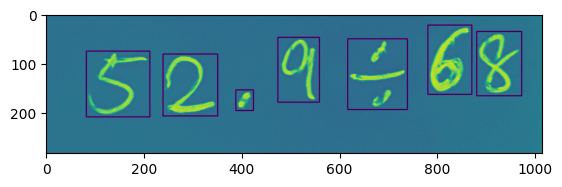

In [167]:
temp = get_image_all_2(eq_dir + eq_list[18])
# [[120, 81, 403, 394], [565, 231, 583, 250], [588, 106, 733, 354], [958, 69, 1105, 403]]

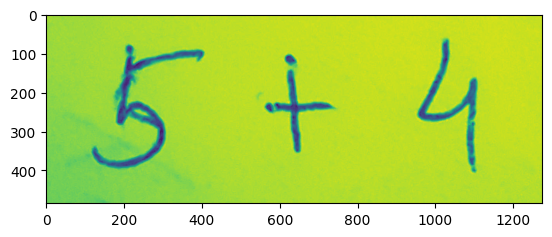

In [117]:
# works with index 6, model_1_inv, and use thresh binary
# ind = 6
ind = 0 #model_1_inv(was 5+4, got 6+4) model_2_inv(got correct)
# ind = 2 #(was 54 + 3, recognized 54 togther instead of individual digits, got 0+3) (got 0+3)
# ind = 3 #(was 42 + 1, got correct) (got correct)
# ind = 4 #(was 21 - 3, got 58 - 3) (got 01-3)
# ind = 5 #(was 2*4, got 2y4) (244)
# ind = 6 #(was 2x + 5 = 7, got correct) (2y+5=7)
# ind = 7 #(was y=3x+4, got yz3x+4) (4z32+4)
# ind = 8 #(was z=3x+4y, got correct) (2=32+4y)
# ind = 9 #(was 1+2, got correct) (1+2)
# ind = 10 #(was 4+5, got correct) (4+0)
# ind = 11 #(was [4+3]*5, got 64+32x5) (04+5345)
# ind = 12 #(was 8/2, got 8x2) (8y2)
# ind = 13 #(was 512/128, got 51219x) (012130)
# ind = 14 #(was 52.9/68, got 5289*68) (5240yz8)
og_img = cv2.imread(eq_dir + eq_list[ind], cv2.IMREAD_GRAYSCALE)
plt.imshow(og_img)

In [118]:
# eq_img = get_image_all(eq_dir + eq_list[ind])
# try to make square contours if its too long
# overlapping contours recursively call it
eq_img = get_image_all_2(eq_dir + eq_list[ind])

[[58 57 56 ... 48 48 48]
 [58 57 56 ... 47 47 47]
 [58 58 57 ... 46 46 46]
 ...
 [70 72 74 ... 53 53 53]
 [71 73 74 ... 53 53 53]
 [71 73 74 ... 53 53 53]]


<ipython-input-112-f3ccbc898425>:30: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  images = np.array(images)


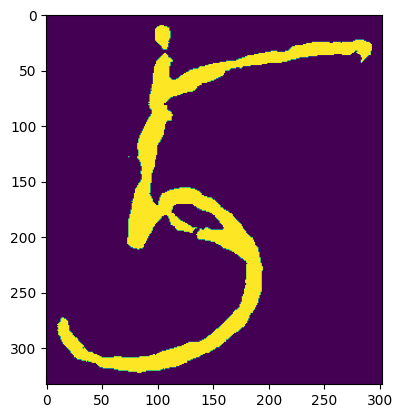

In [ ]:
plt.imshow(eq_img[0])

In [98]:
def process_image(img):
    print(img.shape)
    temp = cv2.resize(img, (img_row, img_col))
    temp = temp / 255
    temp = np.reshape(temp, (img_row, img_col, 1))
    # return temp
    return np.array([temp])

In [ ]:
eq_str = ""
for img in eq_img:
    im = process_image(img)
    pred = model.predict(im)[0]
    lab = label[pred.argmax()]
    print("Predicted label : ", lab)
    if(lab == "eq"):
        lab = "="
    elif(lab == "dec"):
        lab = "."
    eq_str += lab
print(eq_str)

(155, 151)
1/1 [==============================] - 0s 31ms/step
Predicted label :  5
(132, 89)
1/1 [==============================] - 0s 22ms/step
Predicted label :  2
(60, 51)
1/1 [==============================] - 0s 32ms/step
Predicted label :  4
(151, 100)
1/1 [==============================] - 0s 25ms/step
Predicted label :  0
(157, 105)
1/1 [==============================] - 0s 23ms/step
Predicted label :  y
(131, 94)
1/1 [==============================] - 0s 25ms/step
Predicted label :  z
(129, 95)
1/1 [==============================] - 0s 25ms/step
Predicted label :  8
5240yz8


In [ ]:
print(eq_str)

5240yz8


In [101]:
model = tf.keras.models.load_model(model_dir + "model_1_merge_bin.h5")

In [152]:
def process_image(img):
    # print(img.shape)
    temp = cv2.resize(img, (img_row, img_col))
    temp = temp / 255
    temp = np.reshape(temp, (img_row, img_col, 1))
    # return temp
    return np.array([temp])

<ipython-input-162-ead1eb99c073>:30: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  images = np.array(images)


52.9/68 52.9/68
9/3*2-8 9/3*2-8
z=3x+4y z=3x+4y
y=3x+4 y=3x+4
1+2 1+2
7*0.9 7*0.9
Correct predictions:  6


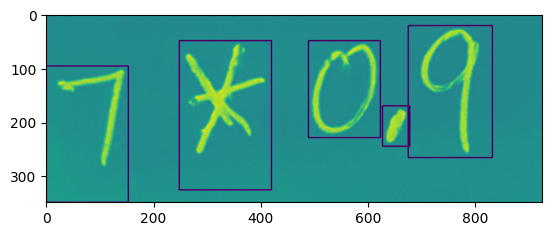

In [179]:
expected = ["52.9/68", "9/3*2-8", "z=3x+4y", "y=3x+4", "1+2", "7*0.9"]
# expected = ["5+4", "3+2", "54+3", "42+1", "21-3", "2*4", "2x+5=7", "y=3x+4", "z=3x+4y", "1+2", "4+5", "[4+3]*5", "8/2", "512/128", "52.9/68", "52.9/68", "4/2*3-1+5=67.89", "4/2*3-1+5", "52.9/68", "7*0.9", "7*0.9", "7*0.9", "9/3*2-8"]
# expected = ["5add4", "3add2", "54add3", "42add1", "21sub3", "2mul4", "2xadd5eq7", "yeq3xadd4", "zeq3xadd4y", "1add2", "4add5", "[4add3]mul5", "8div2", "512div128", "52dec9div68"]

count=0
for ind in range(len(eq_list)):
    # og_img = cv2.imread(eq_dir + eq_list[ind], cv2.IMREAD_GRAYSCALE)
    # plt.imshow(og_img)
    eq_img = get_image_all_2(eq_dir + eq_list[ind])
    eq_str = ""
    # print(eq_img)
    for img in eq_img:
        im = process_image(img)
        pred = model.predict(im, verbose=0)[0]
        lab = label[pred.argmax()]

        # print("Predicted label : ", lab)
        
        if(lab == "eq"):
            lab = "="
        elif(lab == "dec"):
            lab = "."
        elif(lab == "add"):
            lab = "+"
        elif(lab == "sub"):
            lab = "-"
        elif(lab == "div"):
            lab = "/"
        elif(lab == "mul"):
            lab = "*"

        eq_str += lab
    if(expected[ind] == eq_str):
        count += 1
    print(expected[ind], end=" ")
    print(eq_str)
print("Correct predictions: ", count)
# out of 15 images, for thresh binary
# old/model_1_norm: 0
# old/model_1_inv: 5
# old/model_1_thresh: 6
# old/model_2_norm: 0 (not correct)
# old/model_2_inv: 1
# old/model_2_thresh: 2
# new/model_1_inv: 6
# new/model_2_inv: 2
# new/model_3_inv: 3

# out of 15 images, for thresh tozero
# old/model_1_norm: 0
# old/model_1_inv: 5
# old/model_1_thresh: 6
# old/model_2_norm: 0 (not correct)
# old/model_2_inv: 1
# old/model_2_thresh: 2
# new/model_1_inv: 5
# new/model_2_inv: 3
# new/model_3_inv: 3